# Exercises for Probability Theory (1.-5.)

The following script is the solution the exercises for the probability theory section (ie. the exercises 1-5) of the course 'Statistics for Data Science' (WS 19/20) by Prof. Ostwald. The exercise sheets can be found at the website https://www.ewi-psy.fu-berlin.de/einrichtungen/arbeitsbereiche/computational_cogni_neurosc/teaching/Statistics_for_Data_Science_19_20.html.

## Configuration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

%matplotlib inline

In [2]:
# For reproducibility, fix seed.
np.random.seed(42)

## 1. Probability Spaces

### 1. Dice Simulations

In [3]:
mask_even = lambda x : x % 2 == 0 # with P(x is even) = 1/2
mask_smaller_5 = lambda x : x <= 4 # with P(x <= 4) = 2/3
mask_2_4 = lambda x : mask_even(x) & mask_smaller_5(x) # Intersection.

In [4]:
n = 1000
dice_rolls = np.random.randint(1, 7, n)

In [5]:
rolls_even = np.sum(mask_even(dice_rolls))/n
rolls_smaller_5 = np.sum(mask_smaller_5(dice_rolls))/n
rolls_2_4 = np.sum(mask_2_4(dice_rolls))/n

In [6]:
print(f"P(x is even):{rolls_even} \nP(x<5): {rolls_smaller_5}")
print(f"P(x is even and x < 5): {rolls_even * rolls_smaller_5} = {rolls_2_4}") 

P(x is even):0.493 
P(x<5): 0.673
P(x is even and x < 5): 0.331789 = 0.338


### Two events not being independent.

Let P(A) = P(x <= 3) and P(B) = P (x <= 2).

Then P(A) = 1/2 and P(B) = 1/3.

**Not independent:** P(A and B) != P(A) * P(B) as 1/3 != 1/2 * 1/3.

P(A|B) = 1

P(B|A) = 2/3


In [7]:
mask_a = lambda x : x <= 3
mask_b = lambda x : x <= 2
mask_a_and_b = lambda x : mask_a(x) & mask_b(x)

In [8]:
n = 100
dice_rolls = np.random.randint(1, 7, n)
dice_rolls

array([6, 5, 6, 6, 4, 6, 3, 6, 6, 6, 1, 3, 3, 5, 4, 6, 2, 4, 4, 3, 4, 6,
       6, 1, 6, 6, 3, 6, 1, 2, 3, 2, 3, 5, 4, 5, 6, 2, 6, 4, 3, 4, 1, 4,
       1, 4, 1, 2, 6, 6, 5, 6, 3, 4, 5, 3, 3, 1, 6, 2, 2, 5, 2, 4, 2, 5,
       2, 4, 1, 5, 1, 1, 1, 3, 6, 3, 6, 1, 5, 6, 4, 4, 2, 6, 5, 3, 1, 2,
       4, 3, 3, 1, 6, 4, 5, 3, 1, 5, 6, 4])

In [9]:
p_a = np.sum(mask_a(dice_rolls))/n
p_b = np.sum(mask_b(dice_rolls))/n
p_a_and_b = np.sum(mask_a_and_b(dice_rolls))/n

In [10]:
print(f"P(A):{p_a} \nP(B): {p_b}")
print(f"P(A and B): {p_a_and_b}") 

P(A):0.44 
P(B): 0.27
P(A and B): 0.27


In [11]:
b = dice_rolls[mask_b(dice_rolls)]
n_b = len(b)
p_a_given_b = np.sum(mask_a(b)) / n_b

a = dice_rolls[mask_a(dice_rolls)]
n_a = len(a)
p_b_given_a = np.sum(mask_b(a)) / n_a

In [12]:
print(f"P(A|B) = {p_a_given_b}")
print(f"P(B|A) = {p_b_given_a}")

P(A|B) = 1.0
P(B|A) = 0.6136363636363636


These values are close to the analytical estimated ones, P(A|B) = 1 and P(B|A) = 2/3.

### 2. Coin tosses

#### (1) Conditions.

In [13]:
n_tosses = 1000 # Needs to be even, as always two tosses are looked at.
n_toss_pairs = n_tosses // 2 # Two tosses belong together.
tosses = np.random.randint(0, 2, n_tosses)
tosses = np.split(tosses, n_toss_pairs) 
# tosses

Let 0 be heads.

In [14]:
mask_head_first_toss = lambda x : np.array([i[0] == 0 for i in x])
mask_head_snd_toss = lambda x : np.array([i[1] == 0 for i in x])
mask_same_outcome = lambda x : np.array([i[0] == i[1] for i in x])

In [15]:
p_head_first_toss = np.sum(mask_head_first_toss(tosses))/n_toss_pairs
p_head_snd_toss = np.sum(mask_head_snd_toss(tosses))/n_toss_pairs
p_same_outcome = np.sum(mask_same_outcome(tosses))/n_toss_pairs

In [16]:
print(f"P(head first toss) = {p_head_first_toss} should be similar to 1/2")
print(f"P(head snd toss) = {p_head_snd_toss} should be similar to 1/2")
print(f"P(same outcome) = {p_same_outcome} should be similar to 1/2")

P(head first toss) = 0.508 should be similar to 1/2
P(head snd toss) = 0.55 should be similar to 1/2
P(same outcome) = 0.47 should be similar to 1/2


The simulated values match the analytical ones.

#### (2) Co-Occurences.

In [17]:
# Pair_wise
mask_head_first_toss_same_outcome = lambda x : mask_head_first_toss(x) & mask_same_outcome(x)
mask_head_snd_toss_same_outcome = lambda x : mask_head_snd_toss(x) & mask_same_outcome(x)
mask_head_first_snd_toss = lambda x : mask_head_first_toss(x) & mask_head_snd_toss(x)
mask_all_conditions = lambda x : mask_same_outcome(x) & mask_head_first_toss(x) & mask_head_snd_toss(x)

In [18]:
p_head_first_toss_same_outcome = np.sum(mask_head_first_toss_same_outcome(tosses)) /n_toss_pairs
p_head_snd_toss_same_outcome = np.sum(mask_head_snd_toss_same_outcome(tosses)) /n_toss_pairs
p_head_first_snd_toss = np.sum(mask_head_first_snd_toss(tosses)) /n_toss_pairs
p_all_cond = np.sum(mask_all_conditions(tosses)) /n_toss_pairs

In [19]:
print(f"P(first toss is head and same outcome) = {p_head_first_toss_same_outcome}")
print(f"P(snd toss is head and same outcome) = {p_head_snd_toss_same_outcome}")
print(f"P(first and second toss is head) = {p_head_first_snd_toss}")
print(f"P(first and second toss is head and the outcome is the same) = {p_all_cond}")

P(first toss is head and same outcome) = 0.264
P(snd toss is head and same outcome) = 0.264
P(first and second toss is head) = 0.264
P(first and second toss is head and the outcome is the same) = 0.264


The simulated values look similar to the analytical ones (1/4).

## 2. Random Variables

### 1. Probability Mass and and Probability Density

In the following, blue will always indicate sampled distribution and orange/red denotes the true distribution.

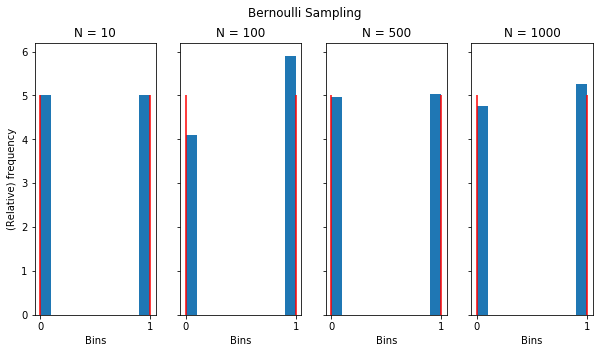

In [20]:
# Bernoulli Random Variable.

number_samples = [10, 100, 500, 1000]

fig, axs = plt.subplots(nrows = 1, ncols = len(number_samples), sharey = True, sharex = True, figsize = (10, 5))
axs = axs.ravel()

for n, ax in zip(number_samples, axs):
    throws = np.random.randint(0, 2, n)
    
    # Sampled function.
    no, bins, _ = ax.hist(throws, density = True, stacked = True, bins = 10)
    
    # Reference function for bins = 10.
    ax.vlines(0, 0, 5, color='r')
    ax.vlines(1, 0, 5, color='r')

    ax.set_title(f"N = {n}")
    ax.set_xlabel("Bins")
        
    ax.set_xticks([0, 1])

axs[0].set_ylabel("(Relative) frequency")
plt.suptitle("Bernoulli Sampling");

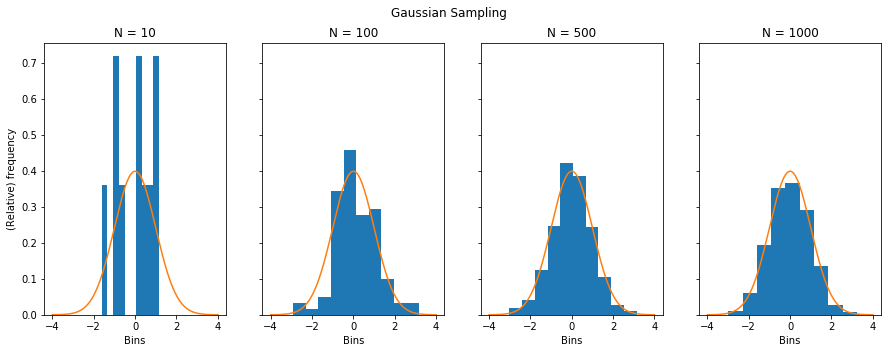

In [21]:
# Gaussian Variable.
mu = 0
sigma = 1

# Parameters for reference values for distribution.
all_ = np.linspace(-4, 4, 10000)
ref_gaussian = lambda x : 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

fig, axs = plt.subplots(nrows = 1, ncols = len(number_samples), sharex = True, sharey = True, figsize = (15, 5))
axs = axs.ravel()

for n, ax, in zip(number_samples, axs):
    var_gaussian = np.random.normal(mu, sigma, n)
    
    # Sampling.
    ax.hist(var_gaussian, density = True, stacked = True)
    
    # Reference function.
    ax.plot(all_, ref_gaussian(all_))
    ax.set_title(f"N = {n}")
    ax.set_xlabel("Bins")

axs[0].set_ylabel("(Relative) frequency")

plt.suptitle("Gaussian Sampling");

**Normalization of Histogram for Gaussian distribution**

For the normalized histograms, the sum of all bins need to sum up to 1. This can achieved by calling his with density = True and setting stacked = True. 
For seeing what happens during the calls, see documentation for density in the matplotlib manual (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html):

"If True, the first element of the return tuple will be the counts normalized to form a probability density, i.e., the area (or integral) under the histogram will sum to 1. This is achieved by dividing the count by the number of observations times the bin width and not dividing by the total number of observations. If stacked is also True, the sum of the histograms is normalized to 1."

**Observation**

As expected, the approximation gets better the more samples we take.

### 2. Distributions for Beta and Gamma

In [22]:
# Used for reference functions.
from scipy.stats import beta as beta_fn
from scipy.stats import gamma as gamma_fn

### Beta.

In [23]:
# Parameters.
alpha = 0.25
beta = 0.5
all_ = np.linspace(0, 1, 100)[1:]

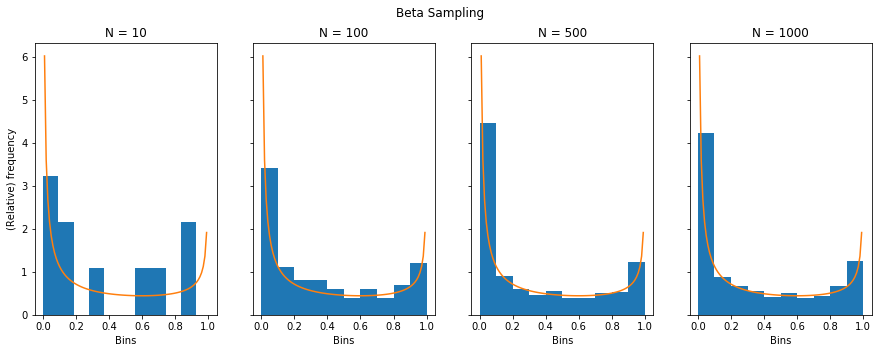

In [24]:
fig, axs = plt.subplots(nrows = 1, ncols = len(number_samples), sharex = True, sharey = True, figsize = (15, 5))
axs = axs.ravel()

for n, ax, in zip(number_samples, axs):
    var_beta = np.random.beta(alpha, beta, n)
    
    # Sampling.
    ax.hist(var_beta, density = True, stacked = True)
    
    # Reference function.    
    ax.plot(all_, beta_fn.pdf(all_, alpha, beta))
    ax.set_title(f"N = {n}")
    ax.set_xlabel("Bins")

axs[0].set_ylabel("(Relative) frequency")

plt.suptitle("Beta Sampling");

### Gamma.

In [25]:
# Parameters.
a = 2
all_ = np.linspace(0, 10, 1000)

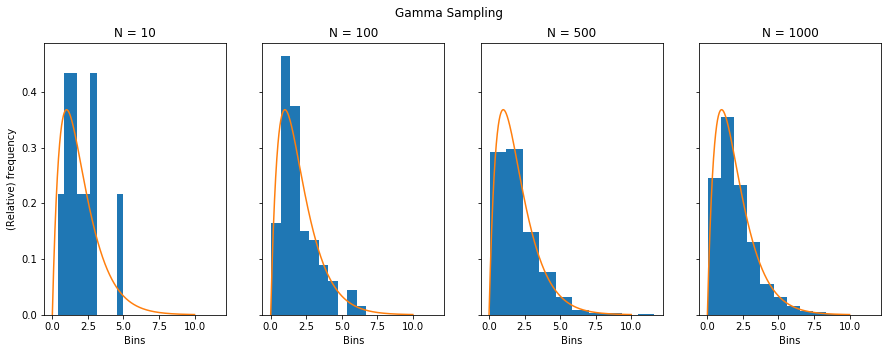

In [26]:
fig, axs = plt.subplots(nrows = 1, ncols = len(number_samples), sharex = True, sharey = True, figsize = (15, 5))
axs = axs.ravel()

for n, ax, in zip(number_samples, axs):
    var_gamma = np.random.gamma(a, size = n)
    
    # Sampling.
    ax.hist(var_gamma, density = True, stacked = True)
    
    # Reference function.    
    ax.plot(all_, gamma_fn.pdf(all_, a))
    ax.set_title(f"N = {n}")
    ax.set_xlabel("Bins")

axs[0].set_ylabel("(Relative) frequency")
plt.suptitle("Gamma Sampling");

**Observation**

The better approximation with more samples also holds true for the gamma and beta distribution.

## 3. Joint distributions

### 1. Gaussian: Bivariate to Univariate

In [27]:
mu = np.array([1, 2]).T
cov = np.array([[0.3, 0.2], [0.2, 0.5]])
sample_size = 1000

In [28]:
# Sampling.
bivariate_sample = random.multivariate_normal(mu, cov, sample_size)

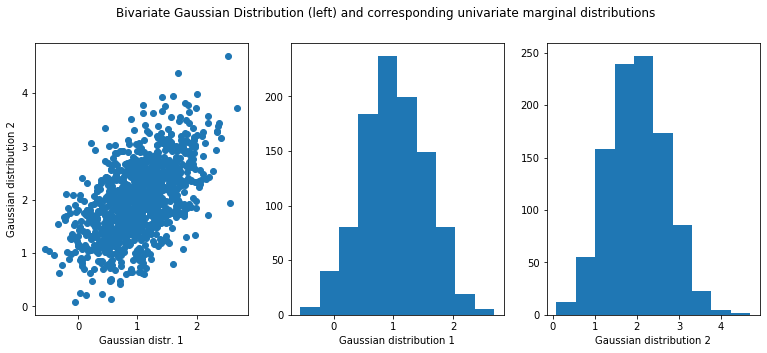

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(13,5))
axs[0].scatter(bivariate_sample[:, 0], bivariate_sample[:, 1])
axs[0].set_xlabel("Gaussian distr. 1")
axs[0].set_ylabel("Gaussian distribution 2")
axs[1].hist(bivariate_sample[:, 0], label = "Univariate Gaussian distribution 1")
axs[1].set_xlabel("Gaussian distribution 1")
axs[2].hist(bivariate_sample[:, 1], label = "Univariate Gaussian distribution 2")
axs[2].set_xlabel("Gaussian distribution 2")
plt.suptitle("Bivariate Gaussian Distribution (left) and corresponding univariate marginal distributions");

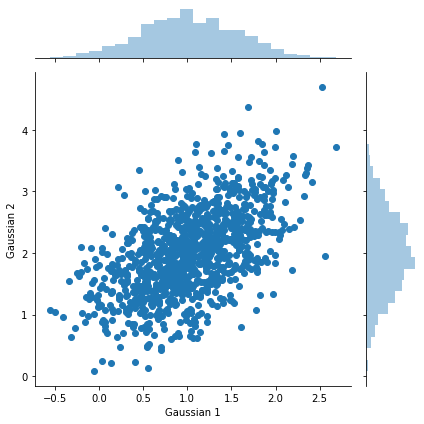

In [30]:
# If additional libraries are allowed, one can also display the relationship in one diagram:
import seaborn as sns
import pandas as pd

sns.jointplot(x="Gaussian 1", y="Gaussian 2", data=pd.DataFrame(bivariate_sample, columns=["Gaussian 1", "Gaussian 2"]))
plt.tight_layout();

In [31]:
# Numerical values.
distr_1_mean = np.mean(bivariate_sample[:, 0])
distr_2_mean = np.mean(bivariate_sample[:, 1])

distr_1_var = np.var(bivariate_sample[:, 0])
distr_2_var = np.var(bivariate_sample[:, 1])

print(f"Distribution 1 mean: {distr_1_mean}, var: {distr_1_var}")
print(f"Distribution 2 mean: {distr_2_mean}, var: {distr_2_var}")

Distribution 1 mean: 1.019864920939983, var: 0.28918903609688534
Distribution 2 mean: 2.013620445947395, var: 0.4760485356184702


**Observations**

The marginal distributions of the bivariate Gaussian distribution are univariate Gaussian distributions, judging by the diagrams above. The mean and variance of the first univariate Gaussian distribution is close to the expected parameters (mean 1, var 0.3). Similar, for the second univariate Gaussian distribution the values are close to the expected (mean 2, variance 0.5), see calculations above.

### 2. Gaussians: Independent Univariate Gaussians

In [32]:
# Sample from multivariate Gaussian
n_distr = 5
eps = 0.0001 # So that variance is greater than 0.
means_ = np.random.randint(1, 10, n_distr)
cov_ = np.diag(np.random.rand(n_distr) + eps)
print("Parameters used:")
print("Means:", means_)
print("Cov:", cov_)

Parameters used:
Means: [5 6 7 9 7]
Cov: [[0.69654221 0.         0.         0.         0.        ]
 [0.         0.30987957 0.         0.         0.        ]
 [0.         0.         0.87310631 0.         0.        ]
 [0.         0.         0.         0.33701384 0.        ]
 [0.         0.         0.         0.         0.61979586]]


In [33]:
samples_multivariate = np.random.multivariate_normal(means_, cov_, 1000)
df = pd.DataFrame(samples_multivariate, columns = ["1", "2", "3", "4", "5"])

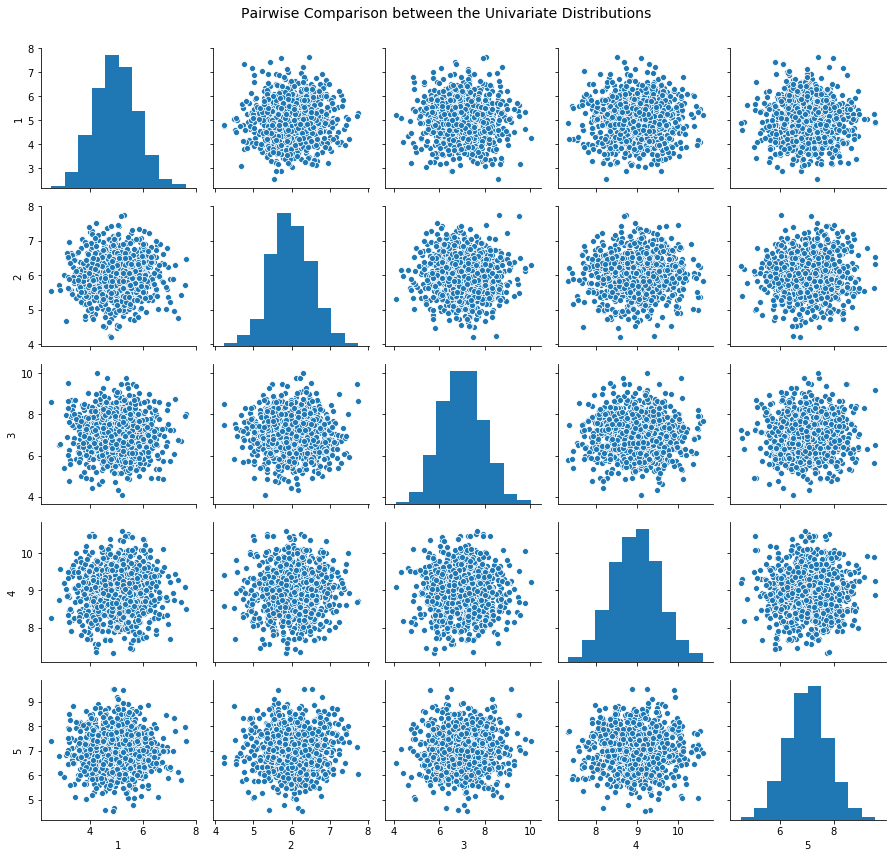

In [34]:
sns.pairplot(df)
plt.suptitle("Pairwise Comparison between the Univariate Distributions", size = 14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

**Observations**

The covariances between the different distributions were 0. Thus, the data points of two distributions lie within a circle (no correlation). Furthermore, you can see on the diagonal axis that the each dimension of the multivariate Gaussian is the same as a univariate Gaussian (with the parameters provided above).

### 3. Joint and Analytical Results on the Gaussian

Here, matrix A and vector b are only numbers. Thus, they will not be defined as matrices as this would be overengineering. The steps if they were matrices are similar.

In [35]:
# Values taken from sheet or randomly generated.
A = 2
b = 1
mu_x = np.random.random(1)
mu_y = A * mu_x + b
var_x = np.random.random(1)
var_y = np.random.random(1)


mu_xy = np.array([mu_x, A * mu_x + b]).flatten()
cov_xy = np.array([[var_x, var_x * A], [A * var_x, var_y + A * var_x * A]]).reshape(2, -2)
cov_xy

array([[0.90126597, 1.80253193],
       [1.80253193, 4.24120867]])

In [36]:
# Draw according to parameters.
n = 100
px = np.random.normal(mu_x, var_x, n)
py = np.random.normal(mu_y, var_y, n)

In [37]:
mu_xy

array([0.53015032, 2.06030064])

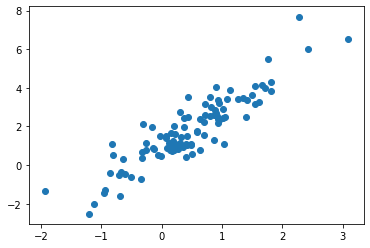

In [38]:
p_xy = np.random.multivariate_normal(mu_xy, cov_xy, 100)
plt.scatter(p_xy[:, 0], p_xy[:, 1]);

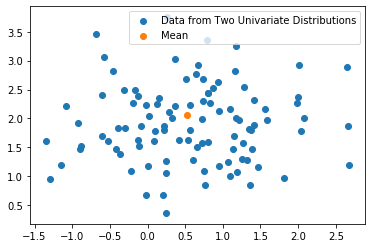

In [39]:
plt.scatter(px, py, label = 'Data from Two Univariate Distributions')
plt.scatter(mu_xy[0], mu_xy[1], label = 'Mean')
plt.legend()

### TODO: 
Univariate X, Y, A = 2, b = 1. Display the pdfs and their large sample normalized histograms.

In [40]:
# As here, the distributions are univariate, A and b will be used as numbers.

In [41]:
# Univariate X and Y, A = 2 and b = 1 (values from sheet).
A = np.array([2]) # 1-dim. Matrix
b = np.array([1]) # 1-dim vector
mu_ = np.array([0.7])
var = np.random.random(1)

In [42]:
px = np.random.normal(mu[0], var[0], 100)
py = np.random.normal(A * mu[0] + b, var[0], 100)
# py = np.random.normal(mu[0], A * var[0] + b, 100)

In [43]:
mu_x = np.array([0.9])
mu_y = np.array([A @ mu_ + b])
mu_xy = np.array([mu_x, mu_y])
mu_xy

array([[0.9],
       [2.4]], dtype=object)

In [44]:
mean_ = np.array([mu_, A * mu_ + b]).flatten()
mean_

array([0.7, 2.4])

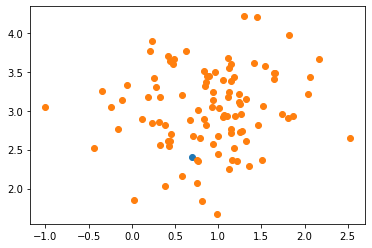

In [45]:
plt.scatter(mean_[0], mean_[1])
plt.scatter(px, py)

## 4. Random Variable Transformations

### 1.  Uniform to Exponential

In [46]:
sample_uniform = np.random.uniform(0, 1, 1000)

In [47]:
# Using the probability integral transform theorem.
# cumulateive distribution: F(x) = 1 - e ** (-x)
# --> F-1(u) = -log(1-u)
# --> x = -log(1-u)
# Actually, x = -log(1-u)/lambda, but let us illustrate the simplest case where lambda = 1.

sample_exp = - np.log(1-sample_uniform)

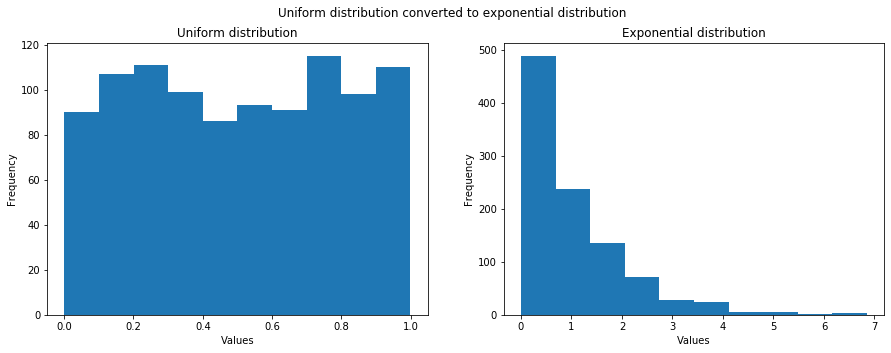

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].hist(sample_uniform)
axs[0].set_title("Uniform distribution")
axs[0].set_xlabel("Values")
axs[0].set_ylabel("Frequency")
axs[1].hist(sample_exp)
axs[1].set_title("Exponential distribution")
axs[1].set_xlabel("Values")
axs[1].set_ylabel("Frequency")
plt.suptitle("Uniform distribution converted to exponential distribution");

**Observation**

For the uniform distribution, all values seem to be equally probable (as expected) and the shape of the exponential is decreasing fast, as expected for the exponential distribution.

## 2. Gaussian to Exponential

**Analytical Evaluation**

1) Use probability integral transform, so first, taking the the Gaussian cumulative distribution, one can transform the Gaussian sampled values to the uniform distribution, ie. uniform(x) = cdf(x). (For exact formula, see https://en.wikipedia.org/wiki/Normal_distribution, CDF).

2) Secondly, the uniform distribution can be transformed to the exponential distribution using the result from 1., i.e. f(sample_uniform) = - np.log(1-sample_uniform).

In [49]:
from scipy.stats import norm

In [50]:
mu_ = 0
std_ = 1
sample_gauss = np.random.normal(mu_, std_, 10000)

In [51]:
# 1) Transform to uniform distribution.
sample_uniform = norm.cdf(sample_gauss)
# 2) Transform to exponential distribution.
sample_exp = - np.log(1-sample_uniform)

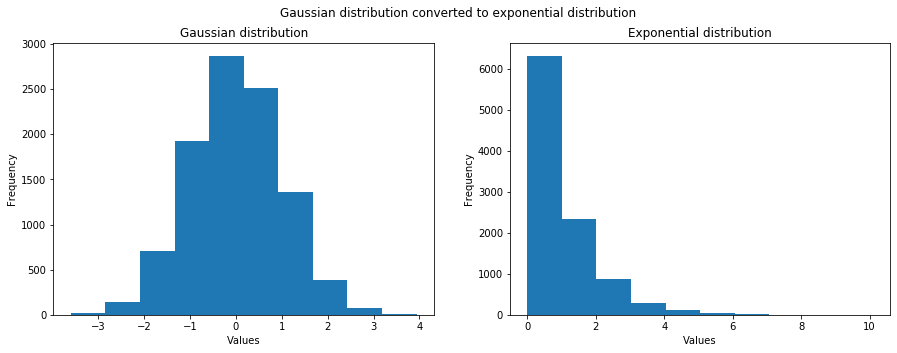

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].hist(sample_gauss)
axs[0].set_title("Gaussian distribution")
axs[0].set_xlabel("Values")
axs[0].set_ylabel("Frequency")
axs[1].hist(sample_exp)
axs[1].set_title("Exponential distribution")
axs[1].set_xlabel("Values")
axs[1].set_ylabel("Frequency")
plt.suptitle("Gaussian distribution converted to exponential distribution");

## 3. Gaussian to Chi2

**For one univariate Gaussian**

In [53]:
from scipy.stats import chi2

In [54]:
sample_gauss = np.random.normal(mu_, std_, 10000)
y = sample_gauss ** 2

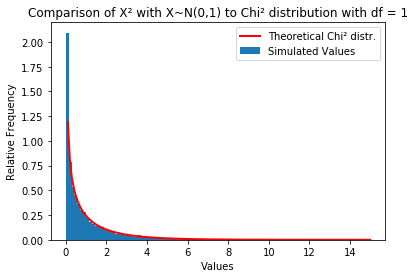

In [55]:
plt.hist(y, density = True, bins = 100, label = 'Simulated Values')
x = np.linspace(0, 15, 150)
plt.xlabel("Values")
plt.ylabel("Relative Frequency")
plt.plot(x, chi2.pdf(x, df=1), color='r', lw=2, label = 'Theoretical Chi² distr.')
plt.legend()
plt.title("Comparison of X² with X~N(0,1) to Chi² distribution with df = 1");

**Observation**

Y as defined X² with X~N(0,1) follows a chi square distribution with degree of freedom = 1.

**For multiple univariate Gaussians**

In [56]:
# Sampling.
n_gaussians = 10
n_per_gaussian = 1000
sim_values = np.zeros(shape=(n_gaussians, n_per_gaussian))

In [57]:
for i in range(n_gaussians):
    sim_values[i] = random.normal(mu_, std_, n_per_gaussian)

In [58]:
sim_values = sim_values ** 2
y = np.sum(sim_values, axis = 0)

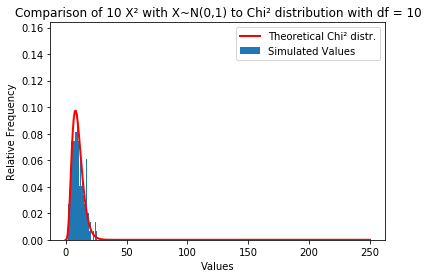

In [59]:
plt.hist(y, density = True, bins = 200, label = 'Simulated Values')
x = np.linspace(0, 250, 300)
plt.xlabel("Values")
plt.ylabel("Relative Frequency")
plt.plot(x, chi2.pdf(x, df=n_gaussians), color='r', lw=2, label = 'Theoretical Chi² distr.')
plt.legend()
plt.title("Comparison of 10 X² with X~N(0,1) to Chi² distribution with df = 10");

**Observation**

Y as defined the sum of 10 X² with X~N(0,1) follows a chi square distribution with degrees of freedom = 10.

## 5. Expectation, (co)variance, inequalities, limits

### 1. Weak law of large numbers

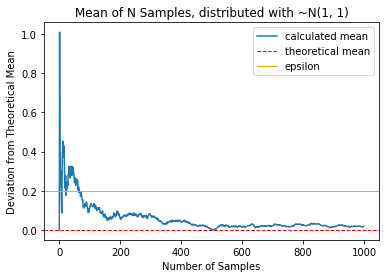

In [60]:
mean_ = 1
std_dev = 1

n_samples = 1000
sample = np.random.normal(mean_, std_dev, n_samples)
# Calculate mean for each additional sample.
all_means = np.zeros(n_samples)
for i in range(1, n_samples):
    all_means[i] = np.abs(np.mean(sample[:i]) - mean_)
    
# Choose arbitray epsilon > 0.
eps = 0.2
    
plt.plot(all_means, label = 'calculated mean')
plt.xlabel("Number of Samples")
plt.ylabel("Deviation from Theoretical Mean")
plt.axhline(mean_ - mean_, color='red', linestyle='dashed', linewidth=1, label = 'theoretical mean')
plt.axhline(eps, color='orange', linewidth = 1, label = 'epsilon')
plt.legend()
plt.title(f"Mean of N Samples, distributed with ~N({mean_}, {std_dev})");

**Observation**

The sample mean gets closer to the true mean 0 for a larger sample size. Following the weak law of large numbers, one could define an epsilon > 0 for which the calculated mean will be always closer to the theoretical mean than the chosen epsilon for a choosen n (sample size).

### 2. Strong law of large numbers

You can show the strong law of large numbers in a similar way as the law of weak numbers. Here, for the probability that the difference between the calculated and the theoretical mean is smaller than epsilon has to hold for all N >= n which has been chosen. In general, the weak, but not the strong law might apply to distributions where there are rare probabilities with high, extreme values. (Then the calculated mean might deviate from the theoretical more than epsilon for an N > n). However, taking a Gaussian distribution, both laws apply.

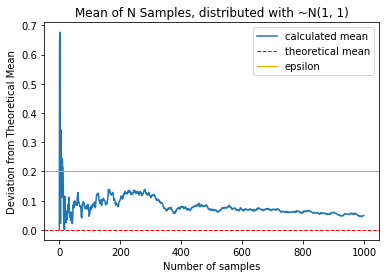

In [61]:
mean_ = 1
std_dev = 1

n_samples = 1000
sample = np.random.normal(mean_, std_dev, n_samples)
# Calculate mean for each additional sample.
all_means = np.zeros(n_samples)
for i in range(1, n_samples):
    all_means[i] = np.abs(np.mean(sample[:i]) - mean_)
    

plt.plot(all_means, label = 'calculated mean')
plt.xlabel("Number of samples")
plt.ylabel("Deviation from Theoretical Mean")
plt.axhline(mean_ - mean_, color='red', linestyle='dashed', linewidth=1, label = 'theoretical mean')
plt.axhline(eps, color='orange', linewidth = 1, label = 'epsilon')
plt.legend()
plt.title(f"Mean of N Samples, distributed with ~N({mean_}, {std_dev})");

### 3. Central Limit Theorem in Lindenberg-Lévy form

In [62]:
from scipy.stats import norm

In [63]:
def inner_lindenberg(samples, mean_true, std_dev_true, n):
    """Calculates the difference of the sample mean to the true, normalized by std dev and sample size."""
    mean_cal = np.mean(samples)
    return np.sqrt(n)*(mean_cal - mean_true)/std_dev_true

In [64]:
n_all_samples = 10000
all_samples_inner = np.zeros(n_all_samples)

for i in range(n_all_samples):
    
    # Each sample is a Bernoulli distribution.
    n = 2000
    mean_ = 0.5
    std_dev = np.sqrt(mean_ * (1 - mean_)) # Analytical result.
    samples = np.random.binomial(1, mean_, n) # Sampling from Bernoulli.
    
    all_samples_inner[i] = inner_lindenberg(samples, mean_, std_dev, n)

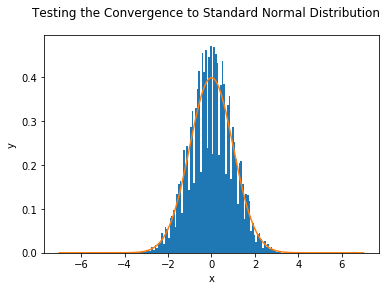

In [65]:
plt.hist(all_samples_inner, density=True, stacked = True, bins = 100)

all_ = np.linspace(-7, 7, 10000)
plt.plot(all_, norm.pdf(all_))

plt.xlabel('x')
plt.ylabel('y')
plt.suptitle('Testing the Convergence to Standard Normal Distribution');

The inner part of the Lindenberg-Levy (within the probability, on the lhs) should be a standard Gaussian distribution (see remark 1, slide 35). This can be verified with the plot above.

Thus, one can now look at the cdf (both, the calculated and the theoretical one):

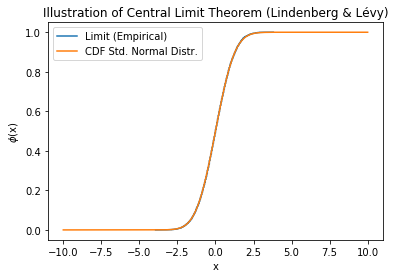

In [66]:
all_samples_inner = np.sort(all_samples_inner)
p = 1. * np.arange(len(all_samples_inner)) / (len(all_samples_inner) - 1)
plt.plot(all_samples_inner, p, label = 'Limit (Empirical)')

# Compare to CDF of normal distribution.
all_ = np.linspace(-10, 10, 10001)
gaussian_cdf = norm.cdf(all_, 0, 1) # CDF of standard normal distribution.
plt.plot(all_, gaussian_cdf, label = 'CDF Std. Normal Distr.')
plt.legend()
plt.ylabel("$\phi$(x)")
plt.xlabel("x")
plt.title("Illustration of Central Limit Theorem (Lindenberg & Lévy)");

**Observations**

The lines are identical which means that the cumultive distribution sum of the rando variables, normalized by mean, sample size as well as std. deviation is equal to the CDF of the standard normal distribution. Here, it has been shown by taking samples from a Bernoulli distribution.

### 4. Central Limit Theorem in the Liapunov form

The central limit theorem in the Liapunov form does not need the samples to be identically distributed. Thus, to test this, I will sample from a Bernoulli distribution with different parameter $p$s.

In [67]:
def y_n(X, mu, var):
    return (np.sum(X) - mu)/np.sqrt(var)

In [68]:
n_all_samples = 10000
y = np.zeros(n_all_samples)
all_means = np.zeros(n_all_samples)
all_var = np.zeros(n_all_samples)


for i in range(n_all_samples):
    
    # Each sample is a Bernoulli distribution, but with different mean.
    # (Thus, the samples are not identically distributed.)
    n = 100
    mean_ = np.random.choice(np.linspace(0.1, 0.9, 9))
    var = mean_ * (1 - mean_)
    samples = np.random.binomial(1, mean_, n) # Sampling from Bernoulli.
    all_means[i] = mean_
    all_var[i] = var
    # N samples are drawn with the same mean and variance.
    y[i] = y_n(samples, mean_ * n, var * n)

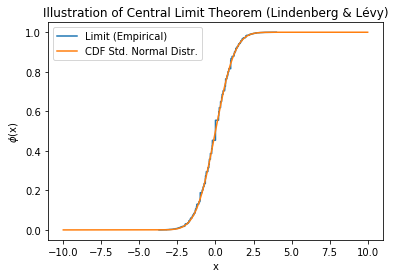

In [69]:
y = np.sort(y)
p = 1. * np.arange(len(all_samples_inner)) / (len(all_samples_inner) - 1)
plt.plot(y, p, label = 'Limit (Empirical)')

# Compare to CDF of normal distribution.
all_ = np.linspace(-10, 10, 10001)
gaussian_cdf = norm.cdf(all_, 0, 1) # CDF of standard normal distribution.
plt.plot(all_, gaussian_cdf, label = 'CDF Std. Normal Distr.')
plt.legend()
plt.ylabel("$\phi$(x)")
plt.xlabel("x")
plt.title("Illustration of Central Limit Theorem (Lindenberg & Lévy)");

**Observation**

As expected, the cumultive distribution of the sum of the samples normalized with mean and standard deviation is the same as the cumulative standard normal distributio for a large n (here n = 1000000).
